# Example tensorflow federated Notebook

Important notes so that you can actually run the notebook
```
Python 3.9 is required to run the notebook (Warning, 3.8 doesn't work!)
the requirements are
    - tensorflow
    - tensorflow-federated
    - juypter
```

To run **TFF** in the notebook, it is required to run those two lines (this is notebook-specific)
```
import nest_asyncio
nest_asyncio.apply()
```

#### Imports

In [27]:
import tensorflow as tf
import tensorflow_federated as tff
import matplotlib.pyplot as plt

""" These two lines are required to make TFF work in a notebook!!!! """
import nest_asyncio
nest_asyncio.apply()

#### Example training on MNIST data (from the TFF homepage)

In [42]:
# Load simulation data.
source, _ = tff.simulation.datasets.emnist.load_data()
def client_data(n):
  return source.create_tf_dataset_for_client(source.client_ids[n]).map(
      lambda e: (tf.reshape(e['pixels'], [-1]), e['label'])
  ).repeat(10).batch(20)

# Pick a subset of client devices to participate in training.
train_data = [client_data(n) for n in range(3)]

# Wrap a Keras model for use with TFF.
def model_fn():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, tf.nn.softmax, input_shape=(784,),
                            kernel_initializer='zeros')
  ])
  return tff.learning.from_keras_model(
      model,
      input_spec=train_data[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.build_federated_averaging_process(
  model_fn,
  client_optimizer_fn=lambda: tf.keras.optimizers.SGD(0.1))
state = trainer.initialize()
_states = []
_metrics = []
T = 60
for t in range(T):
    state, metrics = trainer.next(state, train_data)
    _states.append(state)
    _metrics.append(metrics)
    print("progress = {}, loss = {}".format(t/T,metrics['train']['loss']))

progress = 0.0, loss = 13.897555351257324
progress = 0.016666666666666666, loss = 14.327109336853027
progress = 0.03333333333333333, loss = 14.385420799255371
progress = 0.05, loss = 14.352639198303223
progress = 0.06666666666666667, loss = 14.375885963439941
progress = 0.08333333333333333, loss = 14.471062660217285
progress = 0.1, loss = 14.535594940185547
progress = 0.11666666666666667, loss = 14.535594940185547
progress = 0.13333333333333333, loss = 14.535594940185547
progress = 0.15, loss = 14.535594940185547
progress = 0.16666666666666666, loss = 14.535594940185547
progress = 0.18333333333333332, loss = 14.535594940185547
progress = 0.2, loss = 14.535594940185547
progress = 0.21666666666666667, loss = 14.535594940185547
progress = 0.23333333333333334, loss = 14.535594940185547
progress = 0.25, loss = 14.535594940185547
progress = 0.26666666666666666, loss = 14.535594940185547
progress = 0.2833333333333333, loss = 14.535594940185547
progress = 0.3, loss = 14.535594940185547
progres

In [39]:
_metrics[0]

OrderedDict([('broadcast', ()),
             ('aggregation',
              OrderedDict([('mean_value', ()), ('mean_weight', ())])),
             ('train',
              OrderedDict([('sparse_categorical_accuracy', 0.116),
                           ('loss', 13.897555),
                           ('num_examples', 2750),
                           ('num_batches', 139)]))])

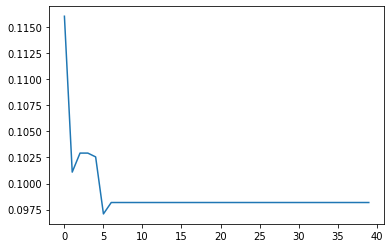

In [41]:
loss = [m['train']['loss'] for m in _metrics]
sca = [m['train']['sparse_categorical_accuracy'] for m in _metrics]
# plt.plot(loss)
plt.plot(sca)

In [16]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [20]:
emnist_train.element_type_structure

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])